<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/LogisticRegression(Iris_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
# 데이터 불러오기
cancer = load_breast_cancer()

In [ ]:
# 표준화하기 normalization
feature = StandardScaler().fit_transform(cancer['data'])

In [ ]:
# train, test 데이터셋 구성
trainX, testX, trainY, testY = train_test_split(feature, cancer.target, test_size = 0.2)

In [ ]:
# Logistic Regression으로 Train 데이터 세트를 학습한다.
model = LogisticRegression()
model.fit(trainX, trainY)

LogisticRegression()

In [ ]:
# Test 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
print("* 시험용 데이터로 측정한 정확도 = %.4f" % model.score(testX, testY))

# 수동으로 계산
predY = model.predict(testX)
accuracy = (testY == predY).mean()
print("* 시험용 데이터로 측정한 정확도 = %.4f" % accuracy)

* 시험용 데이터로 측정한 정확도 = 0.9561
* 시험용 데이터로 측정한 정확도 = 0.9561


In [ ]:
# 학습된 w, b를 확인해 본다.
print('\nw :')
print(model.coef_)
print('\nb :')
print(model.intercept_)


w :
[[-0.60539766 -0.44453821 -0.55090381 -0.55572227 -0.02417327  0.29028779
  -0.79920829 -0.95009444 -0.21393723  0.44981275 -1.0820838   0.41949387
  -0.54210299 -0.89597461 -0.3914551   0.77621969 -0.13314462 -0.12725921
   0.50259027  0.65116256 -1.02161435 -1.64362601 -0.77136446 -0.90995341
  -0.4987986  -0.02305989 -0.7576386  -0.94087453 -0.64991474 -0.58187273]]

b :
[0.44802543]


In [ ]:
# textX[0]의 class를 추정한다.
print('\ntestX[0]의 class :')
print('prob = ', model.predict_proba(testX)[0])


testX[0]의 class :
prob =  [2.25988107e-05 9.99977401e-01]


In [ ]:
# manual로 testX[0]의 class를 추정해 본다. 각 파라메터의 기능을 확인한다.
theta = np.dot(model.coef_[0], testX[0]) + model.intercept_
prob = 1.0 / (1.0 + np.exp(-theta))
print('prob = ', prob)

prob =  [0.9999774]


In [ ]:
# textX의 전체 class 확률를 추정한다.
predY_prob = model.predict_proba(testX)
predY_prob[:10]

array([[2.25988107e-05, 9.99977401e-01],
       [2.76368403e-04, 9.99723632e-01],
       [8.16282494e-07, 9.99999184e-01],
       [1.14633953e-02, 9.88536605e-01],
       [1.66694768e-01, 8.33305232e-01],
       [3.52935476e-03, 9.96470645e-01],
       [1.62137541e-03, 9.98378625e-01],
       [1.04591777e-05, 9.99989541e-01],
       [9.96236561e-01, 3.76343902e-03],
       [6.79529753e-04, 9.99320470e-01]])

In [ ]:
# 확률로 class를 추정한다.
predY2 = np.argmax(predY_prob, axis=1)

predY2

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1])

In [ ]:
# 이전 결과와 비교한다.
predY == predY2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
# C를 변화시켜가면서 정확도를 측정해 본다 
testAcc = []
trainAcc = []
rangeC = np.arange(0.001, 1.0, 0.002) 
for C in rangeC:
  # Logistic Regression으로 Train 데이터 세트를 학습한다.
  model = LogisticRegression(penalty='l2', C=C, max_iter=500) 
  model.fit(trainX, trainY)

  # Test 세트의 Feature에 대한 정확도
  predY = model.predict(testX) 
  testAcc.append((testY == predY).mean())

  # Train 세트의 Feature에 대한 정확도
  predY = model.predict(trainX)
  trainAcc.append((trainY == predY).mean())

In [ ]:
print(trainAcc)
print()
print(testAcc)
print()

[0.8989010989010989, 0.9406593406593406, 0.9516483516483516, 0.9494505494505494, 0.9516483516483516, 0.9516483516483516, 0.9604395604395605, 0.9604395604395605, 0.9648351648351648, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9736263736263736, 0.9758241758241758, 0.9758241758241758, 0.9758241758241758, 0.9758241758241758, 0.9758241758241758, 0.978021978021978, 0.978021978021978, 0.978021978021978, 0.978021978021978, 0.978021978021978, 0.9802197802197802, 0.9802197802197802, 0.9802197802197802, 0.9824175824175824, 0.9824175824175824, 0.9824175824175824, 0.9824175824175824, 0.9824175824175824, 0.9824175824175824, 0.9824175824175824, 0.9824175824175824, 0.9824175824175824, 0.9824175824175824, 0.9824175824175824, 0.9846153846153847, 0.9846153846153847, 0.9846153846153847, 0.9846153846153847, 0.9846153846153847, 0.9846153846153847, 0.9846153846153847, 0.9846153846153847, 0.9846153846153847, 0.9846153846153847, 0.9846153846153847, 0.9846153846153847, 0.98

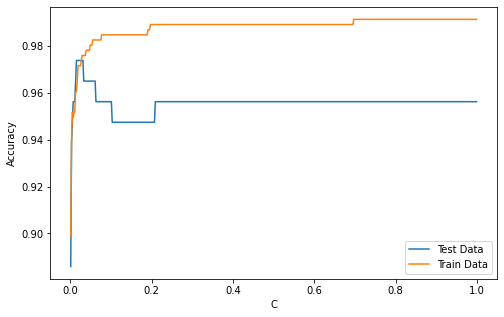

In [ ]:
# C가 증가할수록 정확도가 증가한다. 
plt.figure(figsize=(8, 5))
plt.plot(rangeC, testAcc, label="Test Data") 
plt.plot(rangeC, trainAcc, label="Train Data") 
plt.legend()
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.show()